# Principal Component Regression

#### Based on idea that creating regression model on components that appears after applying dimensionality reduction on variables.

<br>

&nbsp;  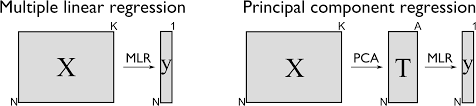

<br>

## Model

In [8]:
import pandas as pd
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [19]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [20]:
y = df["Salary"]

In [23]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype("float64")

In [25]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [27]:
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [42]:
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))

In [47]:
X_reduced_train[:1, :]

array([[-1.91335121, -2.01656078,  1.28783438,  3.40629242,  0.49008919,
         0.45518079, -0.28391172,  0.71141536,  0.20321472,  0.75690289,
         0.00970493,  0.18753423,  0.13828004,  0.29886184,  0.17913327,
        -0.24470371,  0.02667039,  0.05118204, -0.00806432]])

In [48]:
import numpy as np

In [51]:
np.cumsum(pca.explained_variance_ratio_) * 100

array([ 38.72521398,  59.99581559,  70.88526477,  79.0572415 ,
        84.30378062,  88.54326357,  92.10239704,  94.85528459,
        96.34803071,  97.29348336,  98.02392649,  98.69431757,
        99.17630262,  99.48660002,  99.74691162,  99.90925058,
        99.97252616,  99.99432602, 100.        ])

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [56]:
pcr_model.intercept_

543.6646238095238

In [57]:
pcr_model.coef_

array([ 114.85504124,  -27.01860663,   17.25604449,  -44.75172625,
        -49.49681219,   63.32126853,   26.21139244,   34.46923773,
          6.47830172,   51.23668073,   50.77030585,  -11.45295665,
         19.60978297, -207.71340119,   25.54160792,  394.40252364,
       -362.88175754,  767.43859405,   71.49952657])

## Prediction

In [58]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:5]

array([185.98619285, 277.1297043 , 611.78423513, 641.93992322,
       699.59752957])

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
np.sqrt(mean_squared_error(y_train, y_pred))

291.82881279020796

In [67]:
df["Salary"].mean()

535.9258821292775

In [69]:
r2_score(y_train, y_pred)

0.5904682431073305

In [70]:
pca2 = PCA()

In [72]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [74]:
y_pred = pcr_model.predict(X_reduced_test)